In [3]:
import os
import pickle
import time
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from tqdm.notebook import tqdm
import torch.nn.functional as F
from torch.utils.tensorboard import SummaryWriter
import scipy
import json
from scipy import ndimage

2023-07-13 05:43:22.464566: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-13 05:43:22.507301: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-13 05:43:23.100326: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


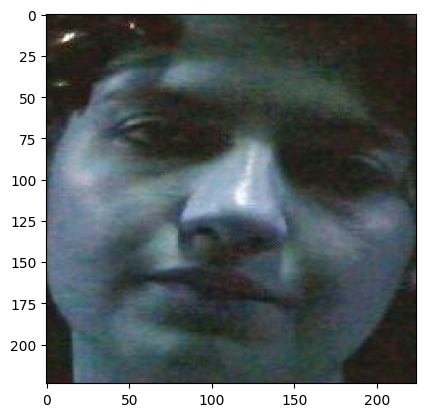

In [2]:
import cv2
import matplotlib.pyplot as plt
a = cv2.imread('data/face_segments2/Exp1_P01_face/P1_4_face/1/image_00001.jpg')
plt.imshow(a)

In [1]:
from IPython.display import clear_output
from AMIGOS import *

2023-06-27 03:29:59.723398: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-27 03:29:59.761457: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-27 03:29:59.761925: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-27 03:30:00.499572: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
root_path = 'data/original_vids'
dst_dir = 'data/vids_segments'

In [3]:
vid_to_frames(root_path, dst_dir)

Segmenting: P37_N1_face.mov
Segment: P37_N1_face.mov 0
Segment: P37_N1_face.mov 1
Segment: P37_N1_face.mov 2
Segment: P37_N1_face.mov 3
Segment: P37_N1_face.mov 4
Segment: P37_N1_face.mov 5
Segment: P37_N1_face.mov 6
Segment: P37_N1_face.mov 7
Segment: P37_N1_face.mov 8
Segment: P37_N1_face.mov 9
Segment: P37_N1_face.mov 10
Segment: P37_N1_face.mov 11
Segment: P37_N1_face.mov 12
Segment: P37_N1_face.mov 13
Segment: P37_N1_face.mov 14
Segment: P37_N1_face.mov 15
Segment: P37_N1_face.mov 16
Segment: P37_N1_face.mov 17
Segment: P37_N1_face.mov 18
Segment: P37_N1_face.mov 19
Segment: P37_N1_face.mov 20
Segment: P37_N1_face.mov 21
Segment: P37_N1_face.mov 22
Segment: P37_N1_face.mov 23
Segment: P37_N1_face.mov 24
Segment: P37_N1_face.mov 25
Segment: P37_N1_face.mov 26
Segment: P37_N1_face.mov 27
Segment: P37_N1_face.mov 28
Segment: P37_N1_face.mov 29
Segment: P37_N1_face.mov 30
Segment: P37_N1_face.mov 31
Segment: P37_N1_face.mov 32
Segment: P37_N1_face.mov 33
Segment: P37_N1_face.mov 34
Se

In [8]:
def count_frames(root_path):
    dt = {}
    for class_name in os.listdir(root_path):
        class_path = os.path.join(root_path, class_name)
        dt[class_name] = {}
        for filename in os.listdir(class_path):
            frames_path = os.path.join(class_path, filename)
            dt[class_name][filename] = {}
            for segment_frames in os.listdir(frames_path):
                segment_frames_path = os.path.join(frames_path, segment_frames)
                dt[class_name][filename][segment_frames] = len(os.listdir(segment_frames_path))
    return dt
a = count_frames(dst_dir)

In [2]:
root_path = 'data/vids_segments'
dst_dir = 'data/face_segments'

In [ ]:
face_detection(root_path, dst_dir)
print(ddd)

2023-06-27 03:30:05.281863: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-27 03:30:05.305915: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


data/vids_segments/Exp2_L15_Indiv_N37_face/P37_U1_face/42/image_00398.jpg
1/1 [==============================] - 0s 101ms/step
data/vids_segments/Exp2_L15_Indiv_N37_face/P37_U1_face/42/image_00207.jpg
1/1 [==============================] - 0s 24ms/step
data/vids_segments/Exp2_L15_Indiv_N37_face/P37_U1_face/42/image_00159.jpg
1/1 [==============================] - 0s 23ms/step
data/vids_segments/Exp2_L15_Indiv_N37_face/P37_U1_face/42/image_00267.jpg
1/1 [==============================] - 0s 22ms/step
data/vids_segments/Exp2_L15_Indiv_N37_face/P37_U1_face/42/image_00140.jpg
1/1 [==============================] - 0s 21ms/step
data/vids_segments/Exp2_L15_Indiv_N37_face/P37_U1_face/42/image_00389.jpg
1/1 [==============================] - 0s 22ms/step
data/vids_segments/Exp2_L15_Indiv_N37_face/P37_U1_face/42/image_00273.jpg
1/1 [==============================] - 0s 23ms/step
data/vids_segments/Exp2_L15_Indiv_N37_face/P37_U1_face/42/image_00501.jpg
1/1 [==============================] - 0s 2

In [5]:
for p in sorted(a.keys()):
    l=[]
    for q in sorted(a[p].keys()):
        l.append(q)
    print(l)


[]
['P1_10_face', 'P1_138_face', 'P1_13_face', 'P1_18_face', 'P1_19_face', 'P1_20_face', 'P1_23_face', 'P1_30_face', 'P1_31_face', 'P1_34_face', 'P1_36_face', 'P1_4_face', 'P1_58_face', 'P1_5_face', 'P1_80_face', 'P1_9_face']
['P2_10_face', 'P2_138_face', 'P2_13_face', 'P2_18_face', 'P2_19_face', 'P2_20_face', 'P2_23_face', 'P2_30_face', 'P2_31_face', 'P2_34_face', 'P2_36_face', 'P2_4_face', 'P2_58_face', 'P2_5_face', 'P2_80_face', 'P2_9_face']
['P3_10_face', 'P3_138_face', 'P3_13_face', 'P3_18_face', 'P3_19_face', 'P3_20_face', 'P3_23_face', 'P3_30_face', 'P3_31_face', 'P3_34_face', 'P3_36_face', 'P3_4_face', 'P3_58_face', 'P3_5_face', 'P3_80_face', 'P3_9_face']
['P4_10_face', 'P4_138_face', 'P4_13_face', 'P4_18_face', 'P4_19_face', 'P4_20_face', 'P4_23_face', 'P4_30_face', 'P4_31_face', 'P4_34_face', 'P4_36_face', 'P4_4_face', 'P4_58_face', 'P4_5_face', 'P4_80_face', 'P4_9_face']
['P5_10_face', 'P5_138_face', 'P5_13_face', 'P5_18_face', 'P5_19_face', 'P5_20_face', 'P5_23_face', 'P5_3

In [9]:
for p in sorted(a.keys()):
    l=[]
    for q in sorted(a[p].keys()):
        l.append(len(a[p][q].keys()))
    if l != [6, 7, 4, 5, 8, 5, 7, 5, 9, 5, 5, 6, 4, 7, 6, 5]:
        print('{}\t{}'.format(p, l))


.ipynb_checkpoints	[]
Exp1_P11_face	[6, 7, 4, 8, 5, 7, 5, 9, 5, 5, 6, 4, 7, 6, 5]
Exp1_P13_face	[6, 7, 4, 5, 8, 5, 7, 5, 9, 5, 5, 6, 7, 6, 5]
Exp1_P39_face	[7, 4, 5, 8, 5, 7, 5, 9, 5, 5, 6, 4, 7, 6, 5]
Exp2_L01_Indiv_N09_face	[72, 72, 58, 44]
Exp2_L02_Indiv_N23_face	[72, 72, 58, 44]
Exp2_L04_Indiv_N25_face	[72, 72, 58, 44]
Exp2_L05_Indiv_N13_face	[72, 72, 58, 44]
Exp2_L07_Indiv_N31_face	[72, 72, 58, 44]
Exp2_L08_Indiv_N26_face	[72, 72, 58, 44]
Exp2_L12_Indiv_N30_face	[72, 72, 58, 44]
Exp2_L13_Indiv_N34_face	[72, 72, 58, 44]
Exp2_L14_Indiv_N35_face	[72, 72, 58, 44]
Exp2_L15_Indiv_N37_face	[72, 72, 58, 44]


In [2]:
data_dir = 'data/'
data_preprocessed_path = os.path.join(data_dir, 'Data_Preprocessed')
json_filename = 'Data_Preprocessed.json'
data_preprocessed(data_dir, data_preprocessed_path, json_filename)
print('ddd')

ddd


In [3]:
with open(os.path.join(data_dir, json_filename), 'r') as f:
    json_object = json.load(f)

In [10]:
json_object['Data_Preprocessed_P18']['20']['AR']

{'1': {'valence': -0.03741232382018402, 'arousal': 0.01011375951848333},
 '2': {'valence': -0.03471711387604622, 'arousal': -0.0221021658293629},
 '3': {'valence': -0.015848838907790447, 'arousal': -0.10698419654125986},
 '4': {'valence': -0.01655541823883372, 'arousal': -0.19464317073611062},
 '5': {'valence': -0.020726564111317347, 'arousal': -0.179525009970507}}

In [1]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
from mtcnn import MTCNN

2023-06-27 02:55:45.450688: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-27 02:55:47.306947: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
torch.cuda.empty_cache()

In [4]:
mtcnn = MTCNN()
t=mtcnn.detect_faces('image_00001.jpg')

InvalidImage: Image not valid.

In [4]:
from mtcnn import MTCNN
import cv2
# import torch
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
img = cv2.cvtColor(cv2.imread('data/vids_segments/Exp2_L15_Indiv_N37_face/P37_U1_face/13/image_00398.jpg'), cv2.COLOR_BGR2RGB)
mtcnn = MTCNN()
t=mtcnn.detect_faces(img)

1/1 [==============================] - 0s 103ms/step


In [5]:
t

[{'box': [370, 270, 228, 296],
  'confidence': 0.9999998211860657,
  'keypoints': {'left_eye': (426, 380),
   'right_eye': (528, 371),
   'nose': (479, 432),
   'mouth_left': (443, 495),
   'mouth_right': (528, 491)}}]

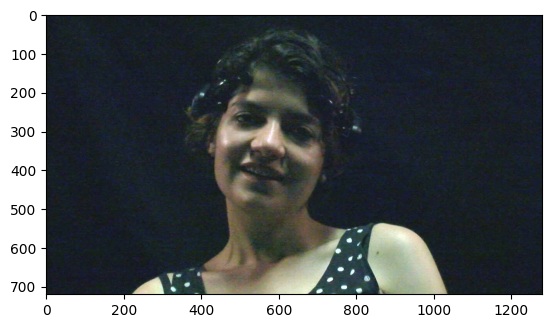

In [21]:
from matplotlib import pyplot as plt
plt.imshow(img)

In [38]:
plt.imsave('a.jpg', cv2.resize(img[t[0]['box'][1]:t[0]['box'][1]+t[0]['box'][3], t[0]['box'][0]:t[0]['box'][0]+t[0]['box'][2]], (224, 224), interpolation=cv2.INTER_CUBIC))

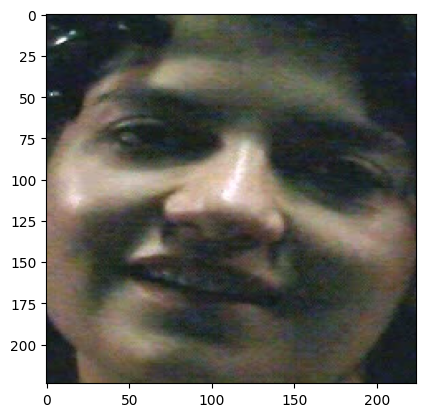

In [35]:
plt.imshow(img2)

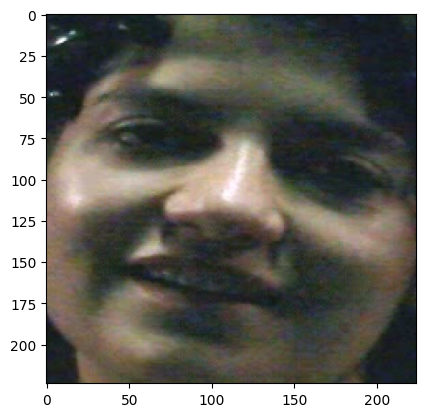

In [33]:
plt.imshow(img2)

In [22]:
t

[{'box': [442, 152, 271, 351],
  'confidence': 0.9999983906745911,
  'keypoints': {'left_eye': (525, 265),
   'right_eye': (655, 293),
   'nose': (577, 337),
   'mouth_left': (506, 400),
   'mouth_right': (621, 424)}}]

In [4]:
# initialise the device for training, if gpu is available, device = 'cuda', else: device = 'cpu'
dataset_name = 'AMIGOS'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
data_dir = './data/' + dataset_name + '/'
mat_files = os.listdir(data_dir)
# log_dir = './log/MNIST_{}/'.format(Model.name)

# create folder if not exist
# if not os.path.exists(save_dir):
#     os.mkdir(save_dir)

In [33]:
mat = scipy.io.loadmat(f)
data = mat['data'] # use the key for data here
target = mat['target'] # use the key for target here

data = torch.from_numpy(data).float()
target = torch.from_numpy(target).long() # change type to your use case

dataset = TensorDataset(data, target)

KeyError: 'data'

In [ ]:
class ResBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(ResBlock, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU()
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(out_channels)
        )
        self.downsample = downsample
        self.relu = nn.ReLU()
        self.out_channels = out_channels
        
    def forward(self, x):
        out = self.conv1(x)
        out = self.conv2(out)
        if self.downsample:
            residual = self.downsample(x)
        out += residual if self.downsample else x
        out = self.relu(out)
        return out
    
class ResNet(nn.Module):
    def __init__(self, num_class, resBlock, layers=[3, 4, 6, 3], rgb=False):
        super(ResNet, self).__init__()
        
        self.in_channels = 64
        self.name = 'ResNet'
        
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=3 if rgb else 1, out_channels=64, kernel_size=7, stride=2, padding=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )
        self.layer1 = self.build_layer(resBlock, 64, repeat[0], stride=1)
        self.layer2 = self.build_layer(resBlock, 128, repeat[1], stride=2)
        self.layer3 = self.build_layer(resBlock, 256, repeat[2], stride=2)
        self.layer4 = self.build_layer(resBlock, 512, repeat[3], stride=2)
        self.avgpool = nn.AvgPool2d(7, stride=1)
        self.fc = nn.Linear(512, num_class)

    def forward(self, x):
        out = self.conv1(x)
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.avgpool(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out
    
    def build_layer(self, resBlock, out_channels, repeat, stride=1):
        downsample  = nn.Sequential(
            nn.Conv2d(self.in_channels, out_channels, kernel_size=1, stride=stride),
            nn.BatchNorm2d(out_channels),
        ) if stride != 1 or self.in_channels != out_channels else None
        
        layers = [resBlock(self.in_channels, out_channels, stride, downsample)] + [resBlock(self.in_channels, out_channels) for i in range(repeat-1)]
        self.in_channels = out_channels
        return nn.Sequential(*layers)

In [ ]:
def show_train_hist(hist, show=False, save=False, path='Train_hist.png'):
    x = range(len(hist['losses']))

    y = hist['losses']
    
    plt.figure()

    plt.plot(x, y)

    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    plt.grid(True)
    plt.tight_layout()

    if save:
        plt.savefig(path)

    if show:
        plt.show()
    else:
        plt.close()

In [ ]:
def train_test(Model, learning_rate):

    # initialise the device for training, if gpu is available, device = 'cuda', else: device = 'cpu'
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    data_dir = './data/'
    save_dir = './MNIST_{}_results/'.format(Model.name)
    log_dir = './log/MNIST_{}/'.format(Model.name)

    # create folder if not exist
    if not os.path.exists(save_dir):
        os.mkdir(save_dir)

    # construct the dataset and data loader
    batch_size = 60
    transform = transforms.Compose([
        transforms.ToTensor(), 
        # acquire through data without transform: 
        # train_data.data.reshape((50000*32*32, 3)).mean(axis=0)/255
        # train_data.data.reshape((50000*32*32, 3)).std(axis=0)/255
        transforms.Normalize(mean=(0.1307,), std=(0.3081,)), 
        transforms.Resize((32, 32))
    ])
    train_data = datasets.MNIST(root=data_dir, train=True, transform=transform, download=True)
    train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
    test_data = datasets.MNIST(root=data_dir, train=False, transform=transform, download=True)
    test_loader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=True)

    # training parameters
    epochs = 100

    # declare the networks
    model = Model.to(device)

    # Cross Entropy Loss function and Stochastic Gradient Descent optimizer
    criterion = nn.CrossEntropyLoss().to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=0.005, momentum=0.9)  

    # tracking variables
    train_hist = {}
    train_hist['losses'] = []
    train_hist['per_epoch_ptimes'] = []

    # logging
    writer = SummaryWriter(comment='lr{}e{}'.format(learning_rate, epochs))

    start_time = time.time()
    # training loop
    for epoch in range(epochs):
        model.train()
        Loss = []
        epoch_start_time = time.time()
        for (image, label) in tqdm(train_loader):
            image = image.to(device)
            label = label.to(device)

            output = model(image)

            # compute the loss
            loss = criterion(output, label)

            # back propagation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # store the loss of each iter
            Loss.append(loss.item())

            # release GPU memory
            del image, label, output, loss
            torch.cuda.empty_cache()

        epoch_loss = np.mean(Loss)  # mean loss for the epoch
        epoch_end_time = time.time()
        per_epoch_ptime = epoch_end_time - epoch_start_time

        # logging
        writer.add_scalar('Loss/train', epoch_loss, epoch + 1)
        writer.add_scalar('TimeTaken/train', per_epoch_ptime, epoch + 1)

        print("Epoch %d of %d with %.2f s" % (epoch + 1, epochs, per_epoch_ptime))
        print("Loss: %.8f" % (epoch_loss))

        # record the loss for every epoch
        train_hist['losses'].append(epoch_loss)
        train_hist['per_epoch_ptimes'].append(per_epoch_ptime)

    end_time = time.time()

    print('Avg per epoch ptime: %.2f, total %d epochs ptime: %.2f' % (
        np.mean(train_hist['per_epoch_ptimes']), epochs, end_time - start_time))
    print("Training finish!... save training results")
    show_train_hist(train_hist, save=True, path=save_dir + 'lr{}e{}'.format(learning_rate, epochs) + '/train_hist.png')
    torch.save(model.state_dict(), save_dir + 'lr{}e{}_{}'.format(learning_rate, epochs, Model.name) + '.model')

    # testing
    with torch.no_grad():
        model.eval()
        pred_true = 0
        for (image, label) in tqdm(test_loader):
            image = image.to(device)
            label = label.to(device)

            output = model(image)
            _, pred = torch.max(output.data, 1)
            pred_true += (pred == label).sum().item()
            del image, label, output, model

        # calculate accuracy
        accuracy = 100 * pred_true / test_data.data.shape[0]
        writer.add_scalar('Accuracy/test', accuracy, learning_rate)

        print('Accuracy: {}%'.format(accuracy)) 
    writer.flush()
    writer.close()

In [ ]:
if __name__ == '__main__':

    # parameters for Models
    num_class = 10

    resnet = ResNet(10, ResBlock)
    train_test(resnet, 0.01)    